In [5]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib

In [3]:
x = pd.period_range('1980-01-01', periods=410, freq='M')
x = x.to_timestamp().to_pydatetime()
y = np.random.randn(len(x)).cumsum()

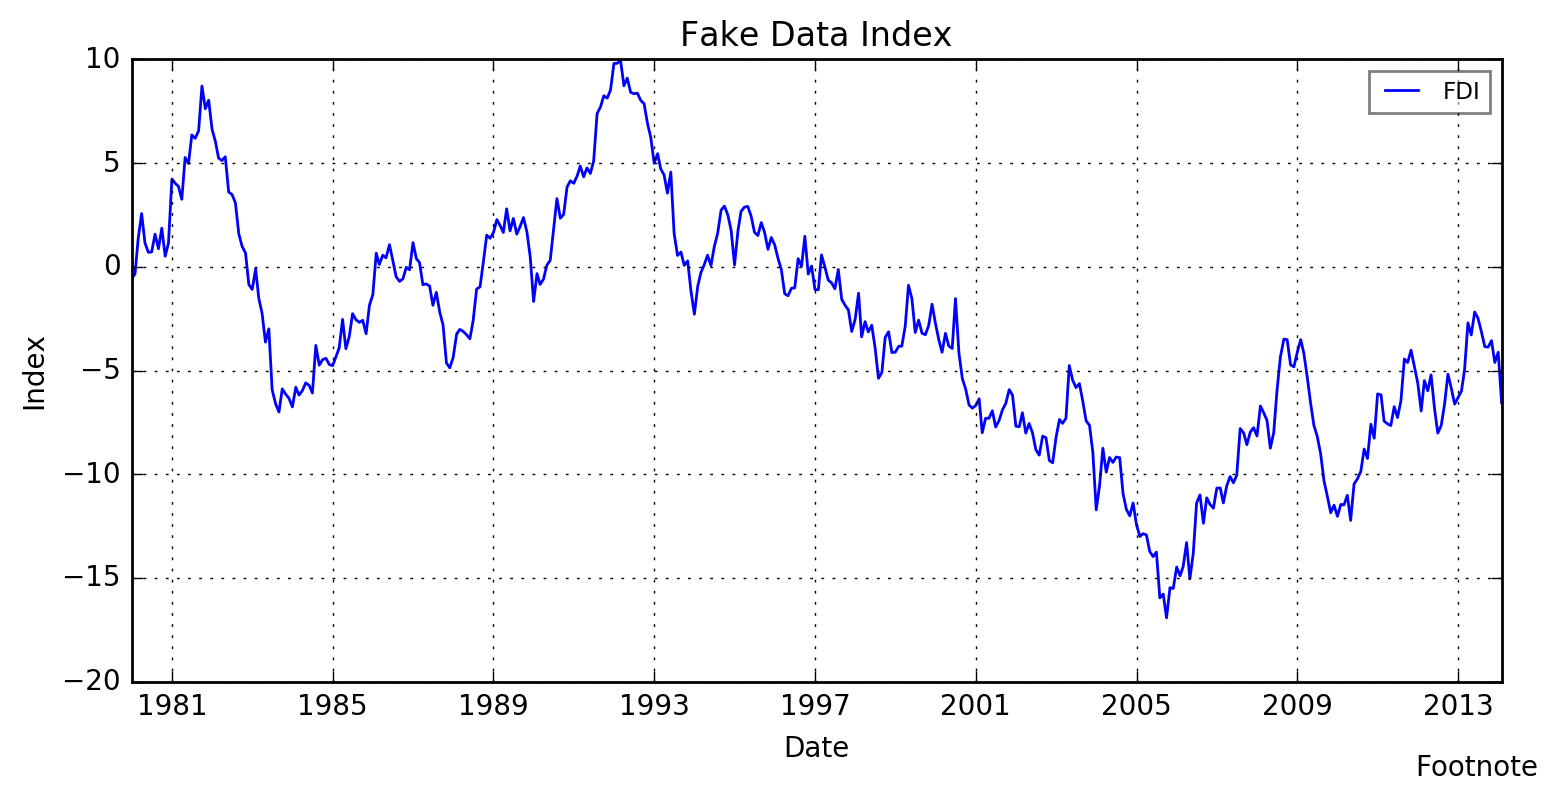

In [8]:
plt.plot(x, y, label='FDI')
plt.title('Fake Data Index')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)
plt.figtext(0.995, 0.01, 'Footnote',ha='right', va='bottom')
plt.legend(loc='best', framealpha=0.5, prop={'size':'small'})
plt.tight_layout(pad=1)
plt.gcf().set_size_inches(8, 4)

# Line plots - using ax.plot()

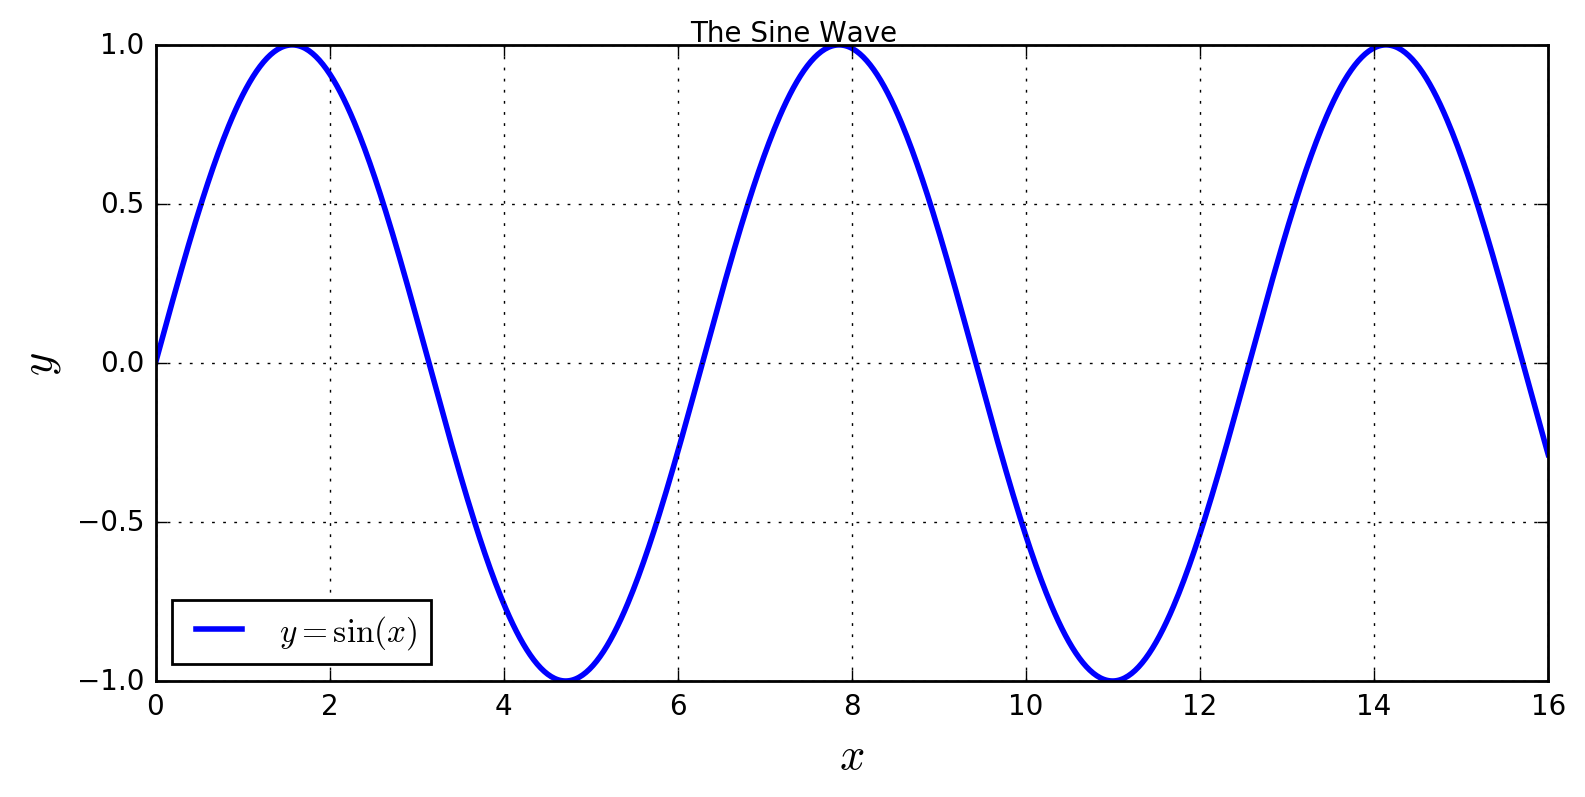

In [13]:
x = np.linspace(0, 16, 800)
y = np.sin(x)

# --- get an empty figure and add an Axes
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1) # row-col-num

# --- line plot data on the Axes
ax.plot(x, y, 'b-', linewidth=2, label='$y=\sin(x)$')
# --- add title, labels and legend, etc.
ax.set_ylabel('$y$', fontsize=16);
ax.set_xlabel('$x$', fontsize=16)
ax.legend(loc='best')
ax.grid(True)
fig.suptitle('The Sine Wave')
fig.tight_layout(pad=1)

# Multiple lines with markers

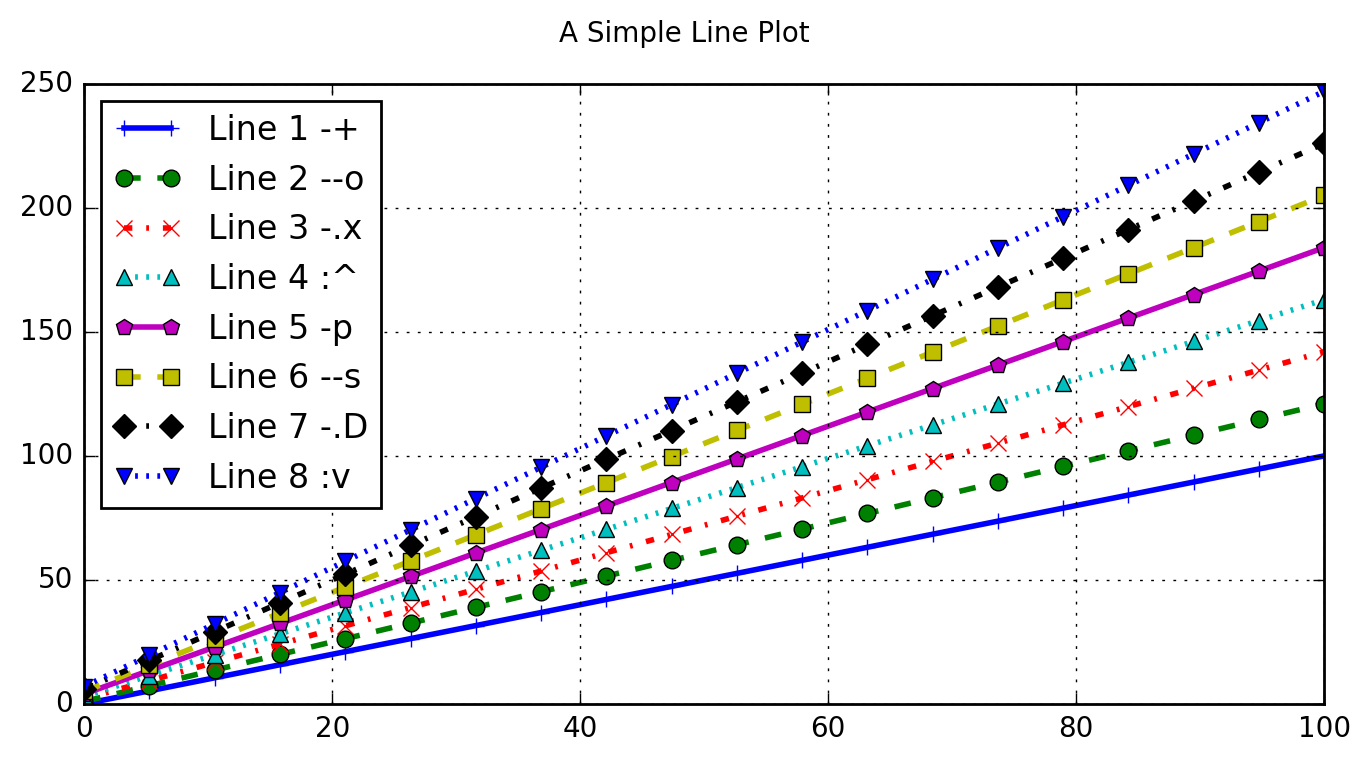

In [14]:
# --- get the Figure and Axes all at once
fig, ax = plt.subplots(figsize=(8,4))

# --- plot some lines
N = 8 # the number of lines we will plot
styles = ['-', '--', '-.', ':']
markers = list('+ox^psDv')

x = np.linspace(0, 100, 20)
for i in range(N): # add line-by-line
    y = x + x/5*i + i
    s = styles[i % len(styles)]
    m = markers[i % len(markers)]
    ax.plot(x, y, label='Line '+str(i+1)+' '+s+m, marker=m, linewidth=2, linestyle=s)

# --- add grid, legend, title and save
ax.grid(True)
ax.legend(loc='best', prop={'size':'large'})
fig.suptitle('A Simple Line Plot')

# Scatter plots - using ax.scatter()

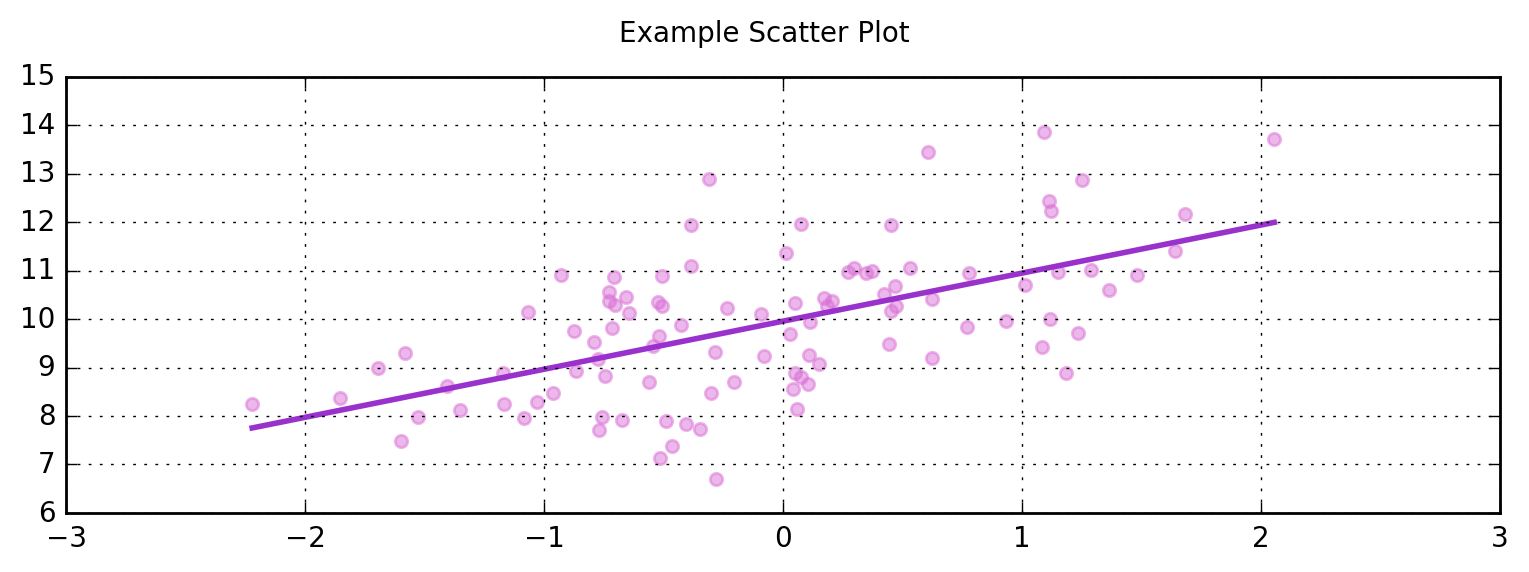

In [18]:
import statsmodels.api as sm

x = np.random.randn(100)
y = x + np.random.randn(100) + 10
fig, ax = plt.subplots(figsize=(8, 3))

ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Example Scatter Plot')
fig.tight_layout(pad=2);
ax.grid(True)

x = sm.add_constant(x) # intercept
# Model: y ~ x + c
model = sm.OLS(y, x)
fitted = model.fit()
x_pred = np.linspace(x.min(), x.max(), 50)
x_pred2 = sm.add_constant(x_pred)
y_pred = fitted.predict(x_pred2)
ax.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)

# scatter marker with size, color

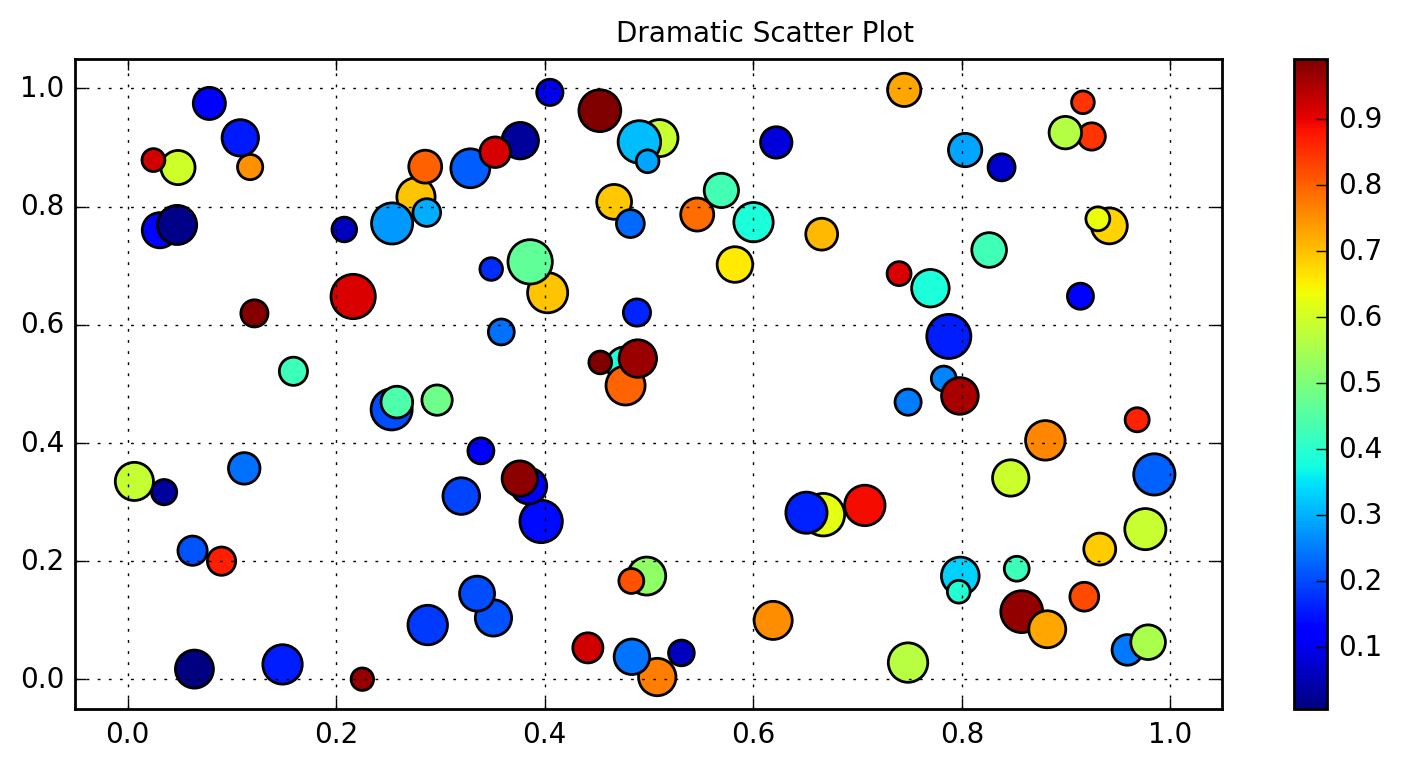

In [20]:
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
size = ((np.random.rand(N) + 1) * 8) ** 2 
colours = np.random.rand(N)
fig, ax = plt.subplots(figsize=(8,4))

l = ax.scatter(x, y, s=size, c=colours) 
fig.colorbar(l)
ax.set_xlim((-0.05, 1.05)) 
ax.set_ylim((-0.05, 1.05)) 
fig.suptitle('Dramatic Scatter Plot') 
fig.tight_layout(pad=2);
ax.grid(True)

# bar plots - using ax.bar() and ax.barh()

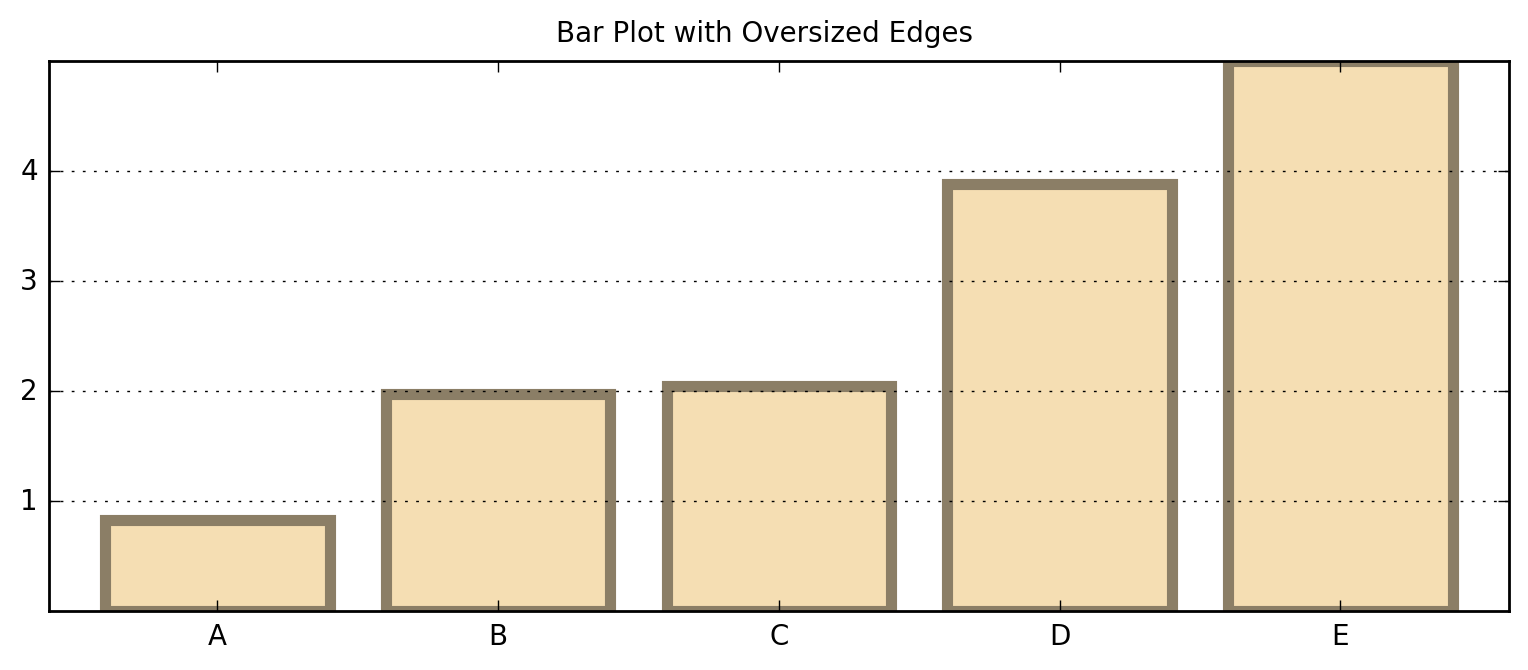

In [22]:
# --- get the data
N=5
labels = list('ABCDEFGHIJKLM'[0:N])
data = np.array(range(N)) + np.random.rand(N)
# --- plot the data
fig, ax = plt.subplots(figsize=(8, 3.5)) 
width = 0.8;
tickLocations = np.arange(N) 
rectLocations = tickLocations-(width/2.0) 
ax.bar(rectLocations, data, width,
    color='wheat',
    edgecolor='#8B7E66', linewidth=4.0) 

# --- pretty-up the plot 
ax.set_xticks(ticks= tickLocations) 
ax.set_xticklabels(labels) 
ax.set_xlim(min(tickLocations)-0.6, max(tickLocations)+0.6) 
ax.set_yticks(range(N)[1:]) 
ax.set_ylim((0,N)) 
ax.yaxis.grid(True)

# --- title and save 
fig.suptitle("Bar Plot with " + "Oversized Edges") 
fig.tight_layout(pad=2) 

# side by side

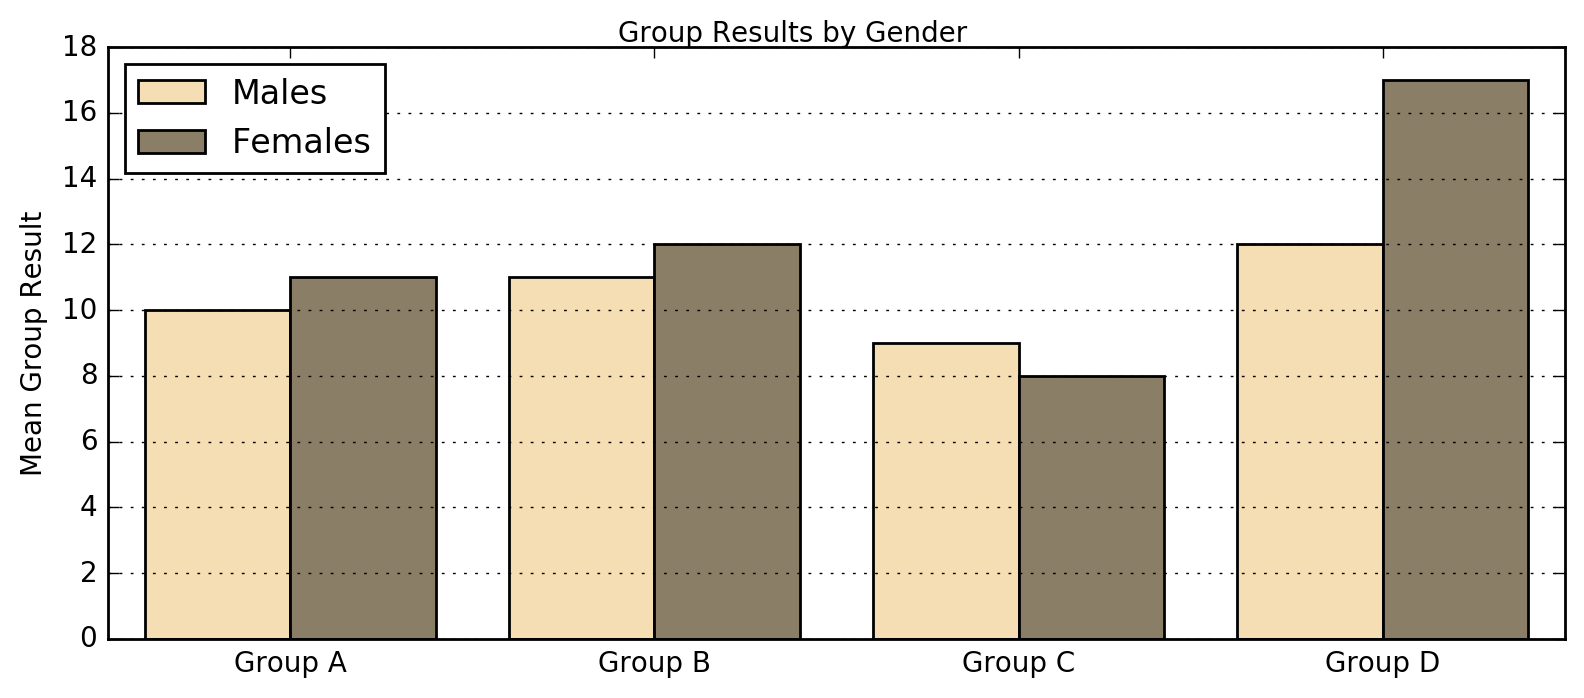

In [24]:
# --- get the data
before = np.array([10, 11, 9, 12])
after = np.array([11, 12, 8, 17]) 
labels=['Group '+x for x in list('ABCD')] 

# --- the plot – left then right
fig, ax = plt.subplots(figsize=(8, 3.5)) 
width = 0.4 # bar width
xlocs = np.arange(len(before)) 
ax.bar(xlocs-width, before, width, color='wheat', label='Males') 
ax.bar(xlocs, after, width, color='#8B7E66', label='Females')

# --- labels, grids and title, then save 
ax.set_xticks(ticks=range(len(before))) 
ax.set_xticklabels(labels) 
ax.yaxis.grid(True) 
ax.legend(loc='best') 
ax.set_ylabel('Mean Group Result') 

fig.suptitle('Group Results by Gender') 
fig.tight_layout(pad=1)

# stacked bar

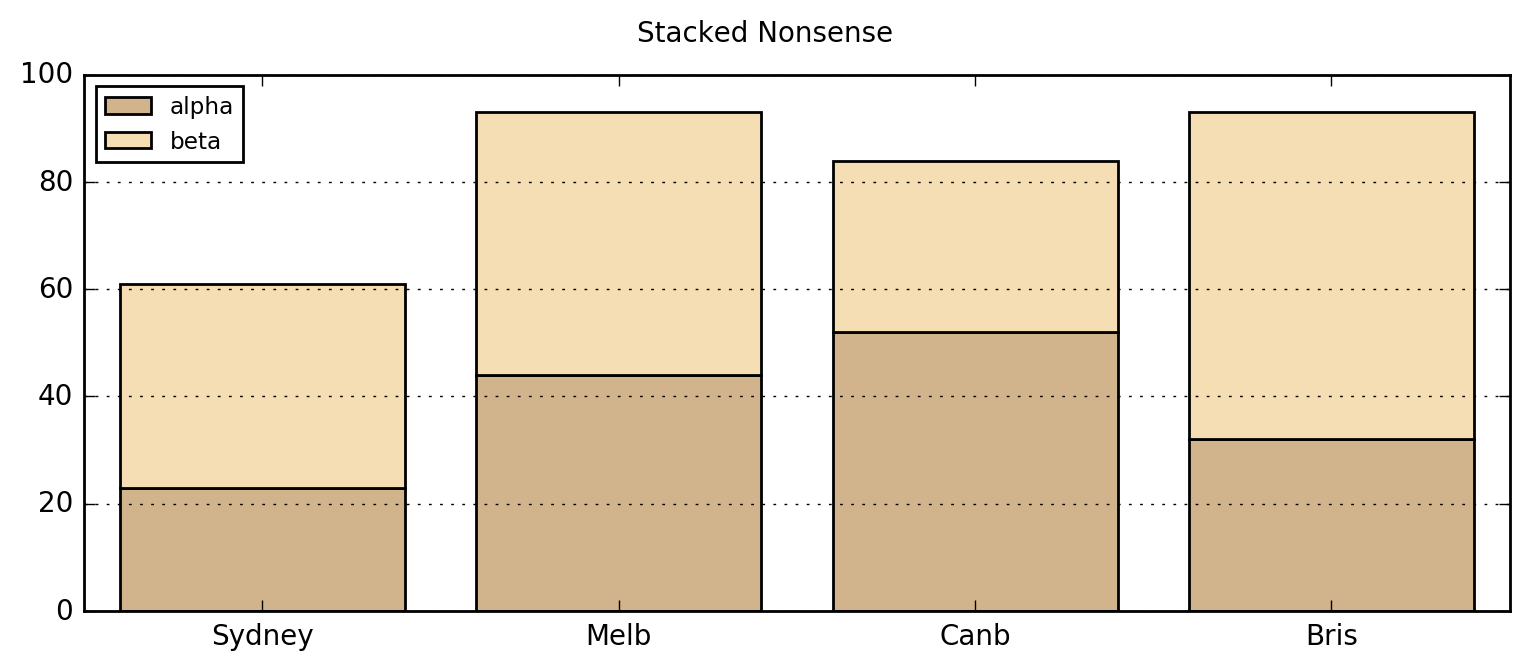

In [26]:
# --- get some data
alphas = np.array( [23, 44, 52, 32] )
betas = np.array( [38, 49, 32, 61] )
labels = ['Sydney', 'Melb', 'Canb', 'Bris'] 

# --- the plot
fig, ax = plt.subplots(figsize=(8, 3.5)) 
width = 0.8; 
xlocations=np.array(range(len(alphas)+2)) 
adjlocs = xlocations[1:-1] - width/2.0 

ax.bar(adjlocs, alphas, width, label='alpha', color='tan') 
ax.bar(adjlocs, betas, width, label='beta', color='wheat', bottom=alphas)

# --- pretty-up and save 
ax.set_xticks(ticks=xlocations[1:-1]) 
ax.set_xticklabels(labels) 
ax.yaxis.grid(True)
ax.legend(loc='best', prop={'size':'small'}) 
fig.suptitle("Stacked Nonsense") 
fig.tight_layout(pad=2)

# Pie Chart - using ax.pie()

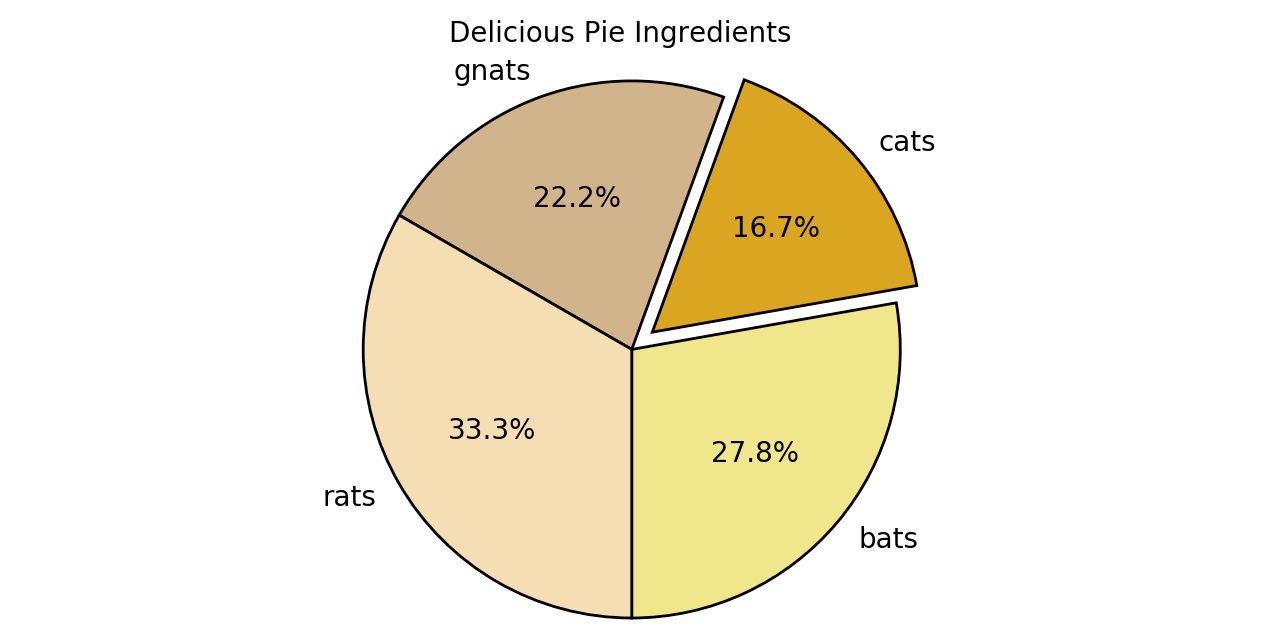

In [28]:
# --- get some data
data = np.array([5,3,4,6])
labels = ['bats', 'cats', 'gnats', 'rats'] 
explode = (0, 0.1, 0, 0) # explode cats 
colrs=['khaki', 'goldenrod', 'tan', 'wheat'] 

# --- the plot
fig, ax = plt.subplots(figsize=(8, 3.5)) 
ax.pie(data, explode=explode,
labels=labels, autopct='%1.1f%%', startangle=270, colors=colrs) 
ax.axis('equal') 

# keep it a circle
# --- tidy-up and save 
fig.suptitle("Delicious Pie Ingredients")

# Polar - using ax.plot()

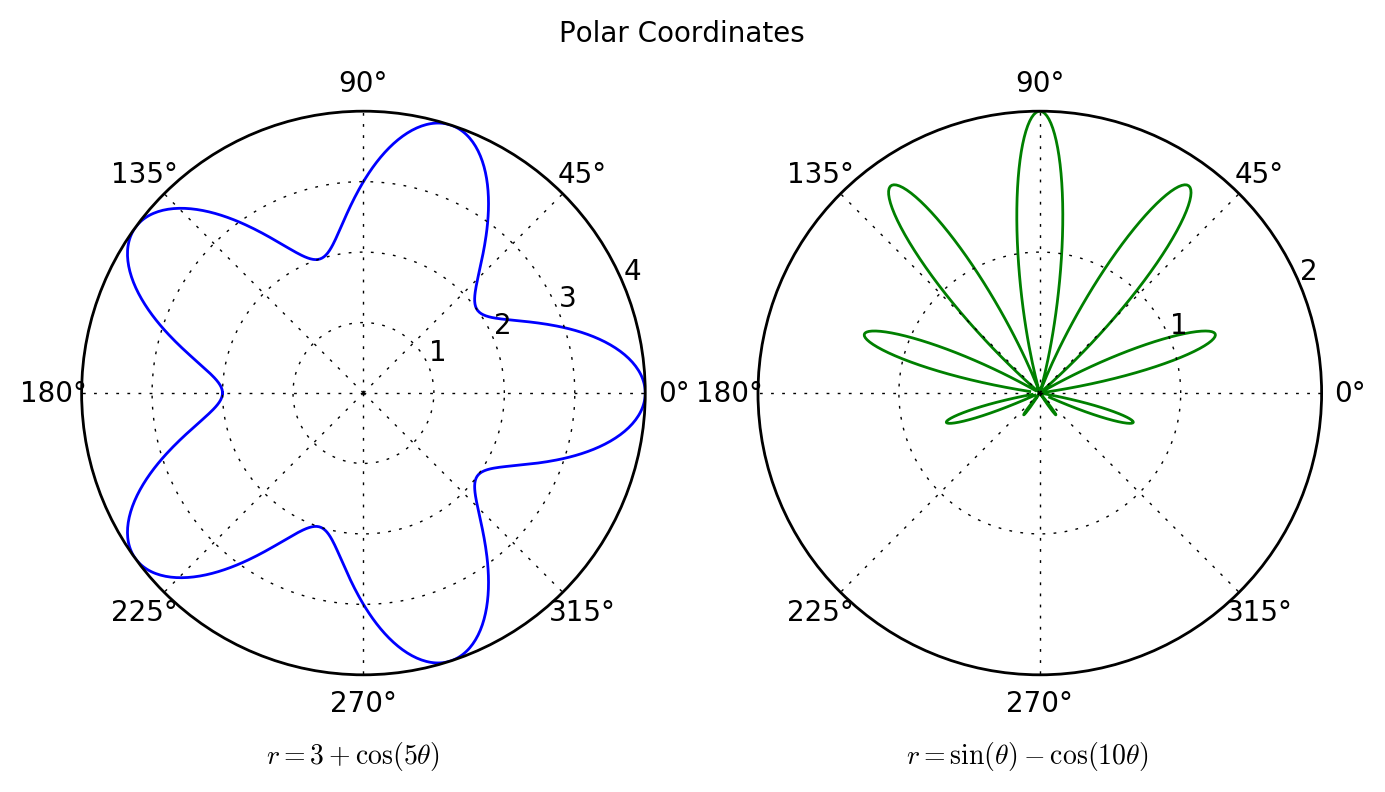

In [29]:
# --- theta
theta = np.linspace(-np.pi, np.pi, 800) # --- get us a Figure
fig = plt.figure(figsize=(8,4))

# --- left hand plot
ax = fig.add_subplot(1,2,1, polar=True) 
r = 3 + np.cos(5*theta)
ax.plot(theta, r) 
ax.set_yticks([1,2,3,4])

# --- right hand plot
ax = fig.add_subplot(1,2,2, polar=True) 
r = (np.sin(theta)) - (np.cos(10*theta)) 
ax.plot(theta, r, color='green') 
ax.set_yticks([1,2])

# --- title, explanatory text and save 
fig.suptitle('Polar Coordinates') 
fig.text(x=0.24, y=0.05, s=r'$r = 3 + \cos(5 \theta)$') 
fig.text(x=0.64, y=0.05, s=r'$r = \sin(\theta) - \cos(10' + r'\theta)$')

# Multiple plots on a canvas

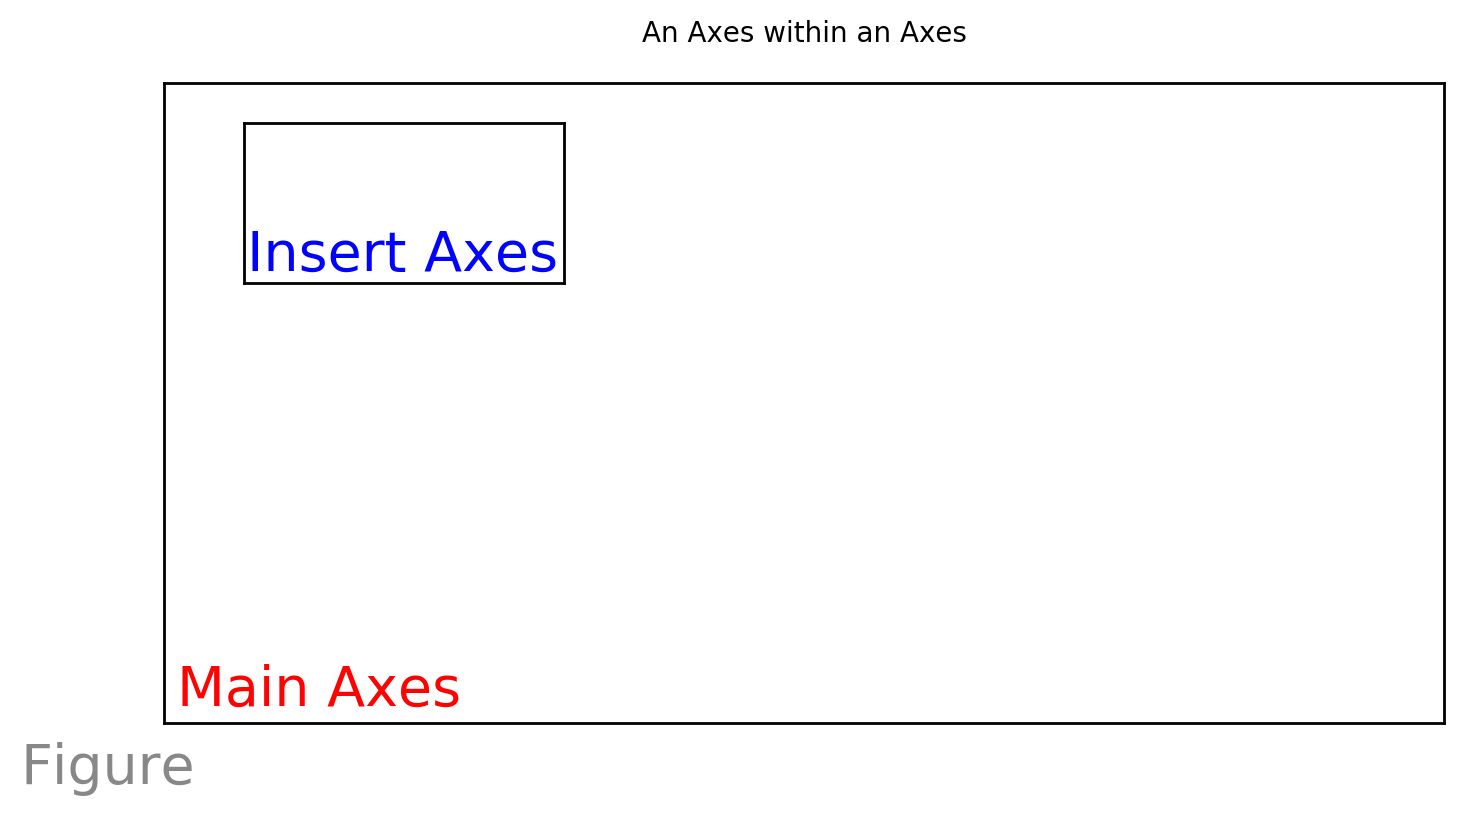

In [30]:
fig = plt.figure(figsize=(8,4)) 

fig.text(x=0.01, y=0.01, s='Figure', color='#888888', ha='left', va='bottom', fontsize=20) # --- Main Axes
ax = fig.add_axes([0.1,0.1,0.8,0.8]) 
ax.text(x=0.01, y=0.01, s='Main Axes', color='red', ha='left', va='bottom', fontsize=20)
ax.set_xticks([]); ax.set_yticks([])

# --- Insert Axes
ax= fig.add_axes([0.15,0.65,0.2,0.2]) 
ax.text(x=0.01, y=0.01, s='Insert Axes', color='blue', ha='left', va='bottom', fontsize=20)
ax.set_xticks([]); 
ax.set_yticks([]) 
fig.suptitle('An Axes within an Axes')

# Simple subplot grid layouts

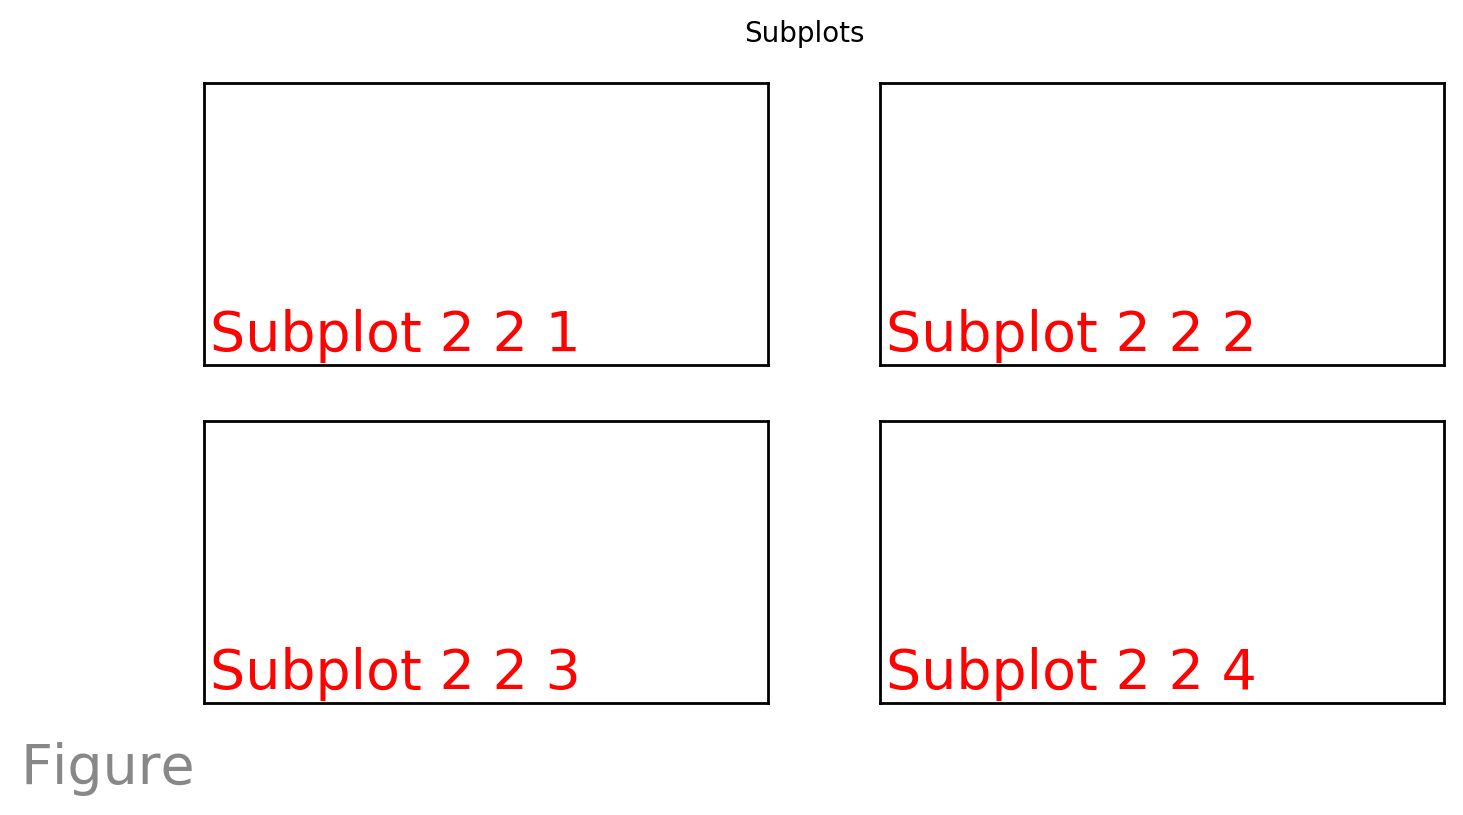

In [31]:
fig = plt.figure(figsize=(8,4)) 
fig.text(x=0.01, y=0.01, s='Figure', color='#888888', ha='left', va='bottom', fontsize=20)

for i in range(4):
    # fig.add_subplot(nrows, ncols, num) 
    ax = fig.add_subplot(2, 2, i+1) 
    ax.text(x=0.01, y=0.01, s='Subplot 2 2 '+str(i+1), color='red', ha='left', va='bottom', fontsize=20)
    ax.set_xticks([]); 
    ax.set_yticks([])
    
ax.set_xticks([]); 
ax.set_yticks([]) 
fig.suptitle('Subplots')